Chapter 08

# kNN回归
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
# import the iris data
iris = datasets.load_iris()

# Only use the first two features: sepal length, sepal width
X = iris.data[:, 0]  # sepal length is the input
X = X.reshape(-1, 1) # reshape it to a column vector
y = iris.data[:, 1]  # sepal width is the output
label = iris.target

# Fit regression model
n_neighbors = 8

In [3]:
# Create color maps
cmap_bold = [[255, 51, 0], [0, 153, 255],[138,138,138]]
cmap_bold = np.array(cmap_bold)/255.

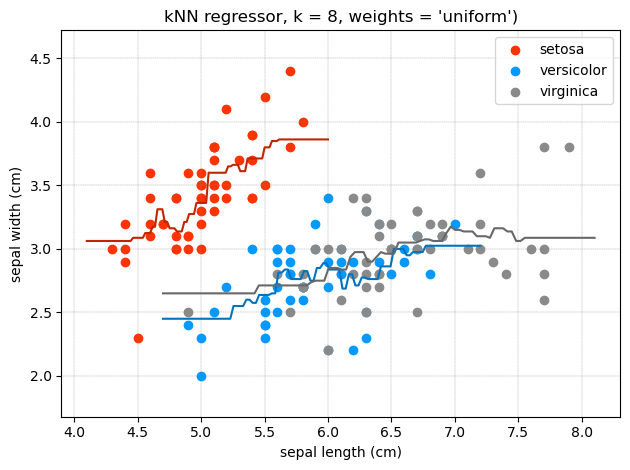

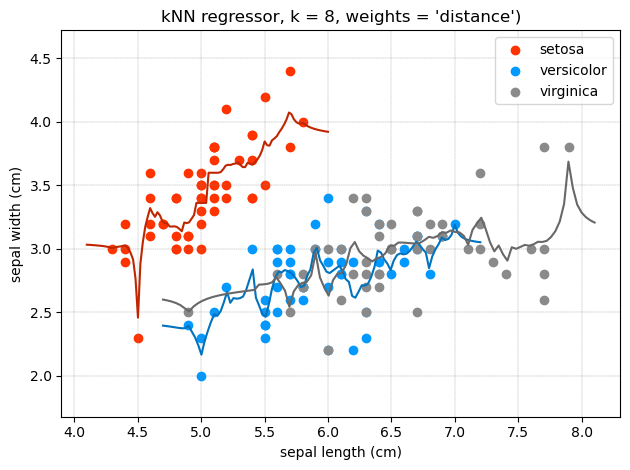

In [4]:
for i, weights in enumerate(['uniform', 'distance']):
    
    fig, ax = plt.subplots()
    
    for i, class_i in enumerate([0, 1, 2]):
        
        # split the sample data based on the labels
        idx = (label == class_i)
        
        # split data based on class
        X_train=X[idx,:]
        y_train=y[idx]
        
        # kNN regressor
        knn_regress = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
        
        # Query points, Q
        Q = np.linspace(X_train.min()-0.2, X_train.max()+0.2, 100)[:, np.newaxis]
        
        # Fit the data
        y_predict = knn_regress.fit(X_train, y_train)
        
        # Predict based on the regression model
        y_predict = knn_regress.predict(Q)
        
        # Visualizations
        plt.scatter(X_train, y_train, color=cmap_bold[i,:], label=iris.target_names[i])
        plt.plot(Q, y_predict, color=cmap_bold[i,:]*0.75)
        plt.axis('tight')
        plt.title("kNN regressor, k = %i, weights = '%s')" 
                  % (n_neighbors,weights))

    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
    plt.tight_layout()
    plt.axis('equal')
    plt.legend()
    plt.show()